In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
sns.set()

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Software V/netflix_titles.csv")
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,cast,description
0,s1,TV Show,3%,NaN,Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...","João Miguel, Bianca Comparato, Michel Gomes, R...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies","Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","Elijah Wood, John C. Reilly, Jennifer Connelly...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,United States,1-Jan-20,2008,PG-13,123 min,Dramas,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",A brilliant group of students become card-coun...


In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
cast            object
description     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  cast          7069 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
cast            6831
description     7769
dtype: int64

In [ ]:
df["type"].head()

0    TV Show
1      Movie
2      Movie
3      Movie
4      Movie
Name: type, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Show Type Count in Netflix dataset')

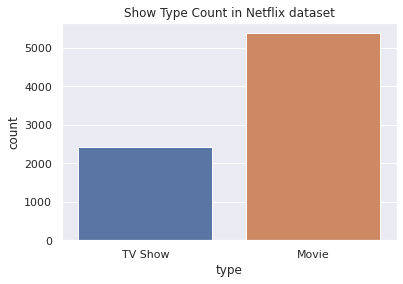

In [ ]:
sns.countplot("type", data=df)
plt.title("Show Type Count in Netflix dataset")

In [ ]:
df["title"]

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#import spacy
#import nltk
#from nltk.stem import PorterStemmer
#from wordcloud import WordCloud

In [ ]:
countvectorizer = CountVectorizer(stop_words="english")
bow = countvectorizer.fit_transform(df["title"])
bow.toarray(), bow.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), (7787, 8047))

In [ ]:
feature_names = countvectorizer.get_feature_names()

feature_names[150:160]

['abdullah',
 'abel',
 'abhinetri',
 'abnormal',
 'abominable',
 'abrazo',
 'abroad',
 'abstract',
 'absurd',
 'abu']

In [ ]:
bow_result_df = pd.DataFrame(bow.toarray(), columns=feature_names)
bow_result_df.head()

,000,009,10,100,1000,100kg,101,12,122,123,12th,13,13th,14,15,16,17,18,187,1897,1898,19,1914,1918,1920,1922,1939,1945,1976,1982,1983,1984,1988,1989,1990,1991,1992,1993,1994,1996,...,zoë,zubaan,zucchini,zulu,zumbo,zz,älskar,æon,çarsi,çok,ég,étaient,íntimo,ñera,òlòtūré,öpücügü,última,último,þig,łukasz,şubat,اشتباك,الدين,الف,القاهرة,دفعة,مبروك,يوم,ายนายเจ,าเล,แผนร,忍者ハットリくん,海的儿子,마녀사냥,미니특공대,반드시,영웅의,잡는다,최강전사,탄생
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_word_df = pd.DataFrame(bow_result_df.sum(), bow_result_df.columns)
frequent_word_df = frequent_word_df.rename(columns={0:"count"})
frequent_word_df = frequent_word_df[frequent_word_df["count"] > 20]
frequent_word_df.head(5)

,count
adventures,21
america,22
american,45
baby,27
bad,25


In [ ]:
frequent_word_sorted_df = frequent_word_df.sort_values("count", ascending=False)
frequent_word_sorted_df.head()

,count
love,152
man,79
christmas,78
world,69
story,67


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Word Count of Movie Titles')

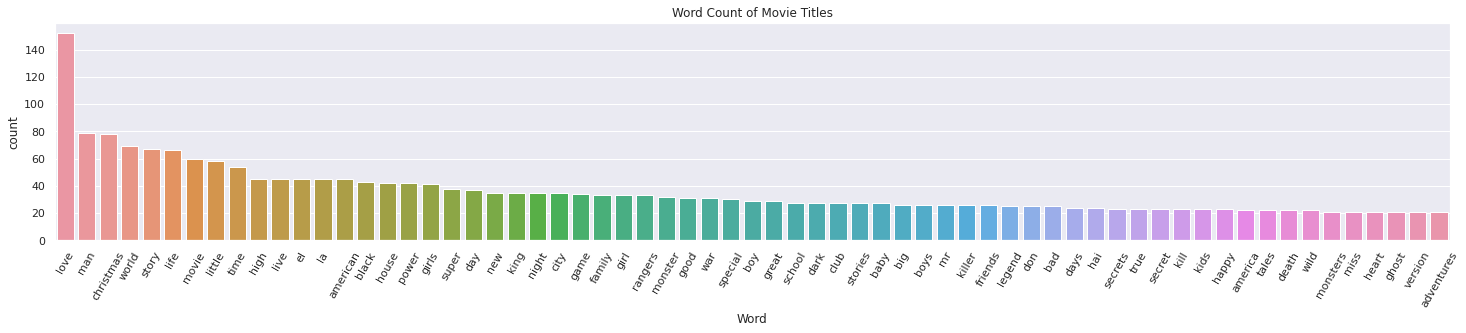

In [ ]:
plt.figure(figsize=(25, 4))
sns.barplot(frequent_word_sorted_df.index, frequent_word_sorted_df["count"])
plt.xticks(rotation=60)
plt.xlabel("Word")
plt.title("Word Count of Movie Titles")

In [ ]:
df["director"].isnull().sum()

2389

In [ ]:
# pick up directors who directs more than twice.
director_df = df["director"]
director_removed_nan_df = director_df.dropna()
director_removed_nan_df.head()

1    Jorge Michel Grau
2         Gilbert Chan
3          Shane Acker
4       Robert Luketic
5          Serdar Akar
Name: director, dtype: object

In [ ]:
director_count = {}

for i in director_removed_nan_df.index:
    director_count.setdefault(director_removed_nan_df[i], 0)
    director_count[director_removed_nan_df[i]] += 1

In [ ]:
frequent_director_count = {}

for key,value in director_count.items():
    if value >= 6:
        frequent_director_count.setdefault(key, value)

In [ ]:
frequent_director_count

{'Anees Bazmee': 6,
 'Ashutosh Gowariker': 6,
 'Cathy Garcia-Molina': 13,
 'David Dhawan': 9,
 'Don Michael Paul': 7,
 'Fernando Ayllón': 7,
 'Hakan Algül': 8,
 'Hanung Bramantyo': 6,
 'Imtiaz Ali': 6,
 'Jay Chapman': 12,
 'Jay Karas': 14,
 'Joey So': 6,
 'Johnnie To': 8,
 'Justin G. Dyck': 7,
 'Kunle Afolayan': 8,
 'Lance Bangs': 8,
 'Marcus Raboy': 16,
 'Martin Scorsese': 12,
 'Matt Askem': 6,
 'McG': 7,
 'Noah Baumbach': 6,
 'Omoni Oboli': 7,
 'Ozan Açıktan': 7,
 'Quentin Tarantino': 8,
 'Rajkumar Santoshi': 6,
 'Ram Gopal Varma': 6,
 'Raúl Campos, Jan Suter': 18,
 'Robert Rodriguez': 8,
 'Robert Vince': 6,
 'Ron Howard': 6,
 'Ryan Polito': 8,
 'S.S. Rajamouli': 7,
 'Sameh Abdulaziz': 6,
 'Shannon Hartman': 8,
 'Sooraj R. Barjatya': 6,
 'Steven Soderbergh': 6,
 'Steven Spielberg': 10,
 'Troy Miller': 6,
 'Vlad Yudin': 6,
 'Wenn V. Deramas': 6,
 'Youssef Chahine': 12,
 'Yılmaz Erdoğan': 7}

In [ ]:
sorted_dict = sorted(frequent_director_count.items(), key=lambda x:x[1], reverse=True)
x = []
y = []
for i in range(len(sorted_dict)):
    x.append(sorted_dict[i][0])
    y.append(sorted_dict[i][1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Director(s)')

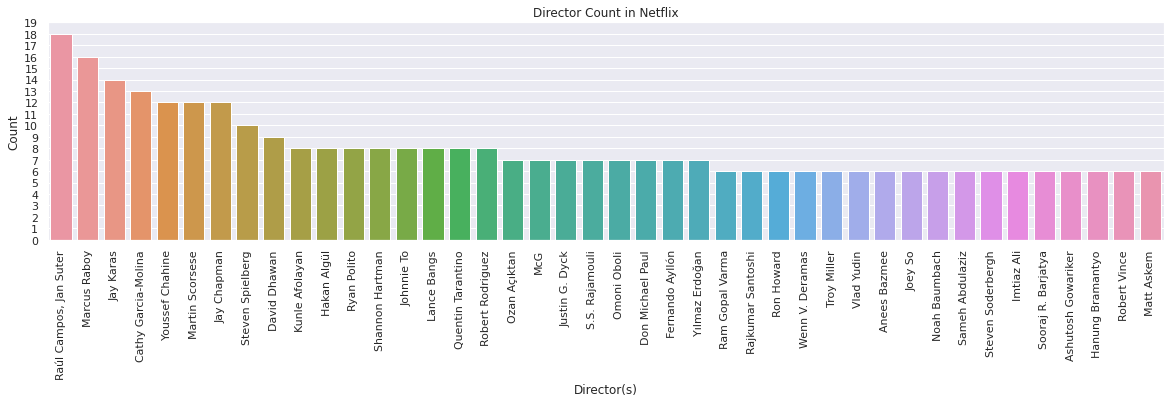

In [ ]:
plt.figure(figsize=(20,4))
sns.barplot(x, y)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 20, step=1))
plt.title("Director Count in Netflix")
plt.ylabel("Count")
plt.xlabel("Director(s)")

In [ ]:
df["country"][0]

'Brazil'

In [ ]:
df["country"].dropna()[0].split(",")

['Brazil']

In [ ]:
# Key: Country Name, Value: Times that each country appears.
frequent_country = {}

for i in df["country"].dropna().index:
    country_list = df["country"].dropna()[i].split(",")
    for country in country_list:
        frequent_country.setdefault(country, 0)
        frequent_country[country] += 1

In [ ]:
sorted_dict = sorted(frequent_country.items(), key=lambda x:x[1], reverse=True)
x = []
y = []
for i in range(len(sorted_dict)):
    x.append(sorted_dict[i][0])
    y.append(sorted_dict[i][1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Country Count in Netflix')

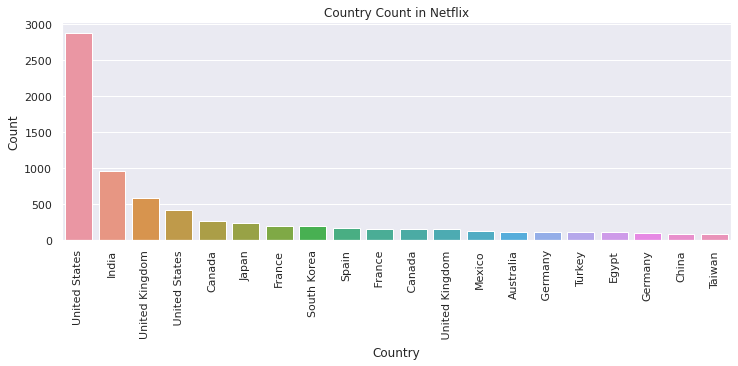

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x[:20], y[:20])
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Country Count in Netflix")

In [ ]:
df["date_added"]

0       14-Aug-20
1       23-Dec-16
2       20-Dec-18
3       16-Nov-17
4        1-Jan-20
          ...    
7782    19-Oct-20
7783     2-Mar-19
7784    25-Sep-20
7785    31-Oct-20
7786     1-Mar-20
Name: date_added, Length: 7787, dtype: object

In [ ]:
df["date_added"].isnull().sum()

10

In [ ]:
date_count_series = df.groupby("date_added")["show_id"].count()
date_count_series.head()

date_added
 April 15, 2018    1
 April 16, 2019    1
 April 17, 2016    1
 April 20, 2017    1
 April 4, 2017     1
Name: show_id, dtype: int64

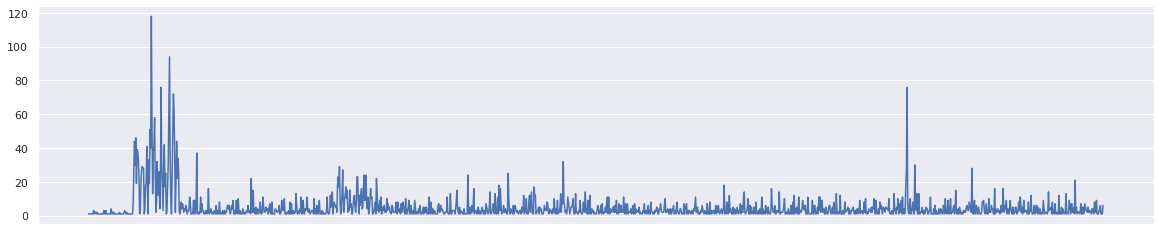

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(date_count_series.index, date_count_series.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

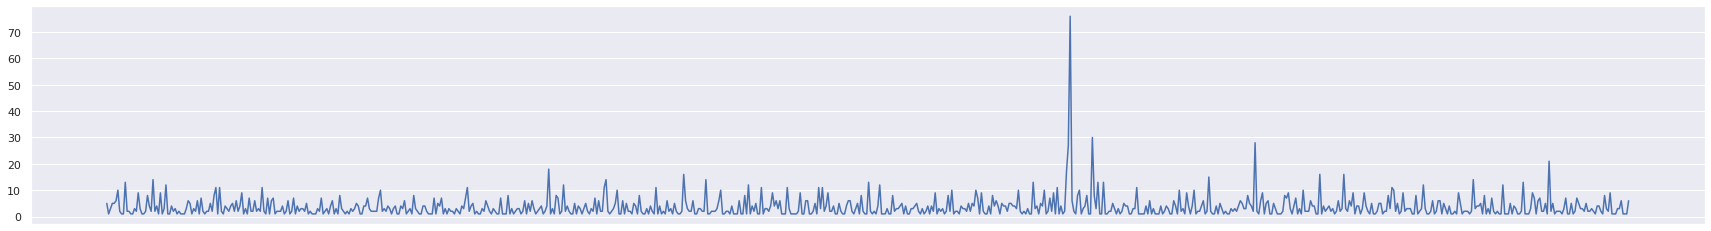

In [ ]:
plt.figure(figsize=(30, 4))
plt.plot(date_count_series[date_count_series.index >= "2016-01-01"].index, date_count_series[date_count_series.index >= "2016-01-01"].values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

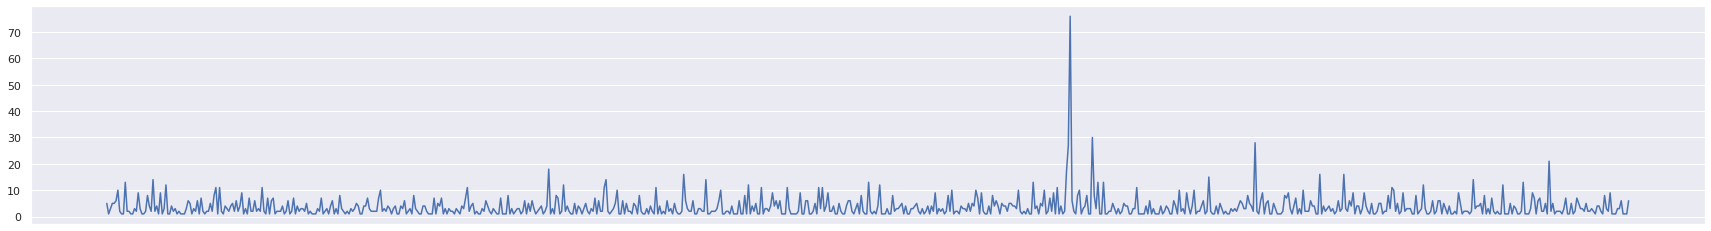

In [ ]:
plt.figure(figsize=(30, 4))
plt.plot(date_count_series[date_count_series.index >= "2019-01-01"].index, date_count_series[date_count_series.index >= "2019-01-01"].values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

In [ ]:
release_year_series = df.groupby("release_year")["show_id"].count()
release_year_series.index = pd.to_datetime(release_year_series.index, format="%Y")
release_year_series.head(5)

release_year
1925-01-01    1
1942-01-01    2
1943-01-01    3
1944-01-01    3
1945-01-01    3
Name: show_id, dtype: int64

Text(0.5, 0, 'Year')

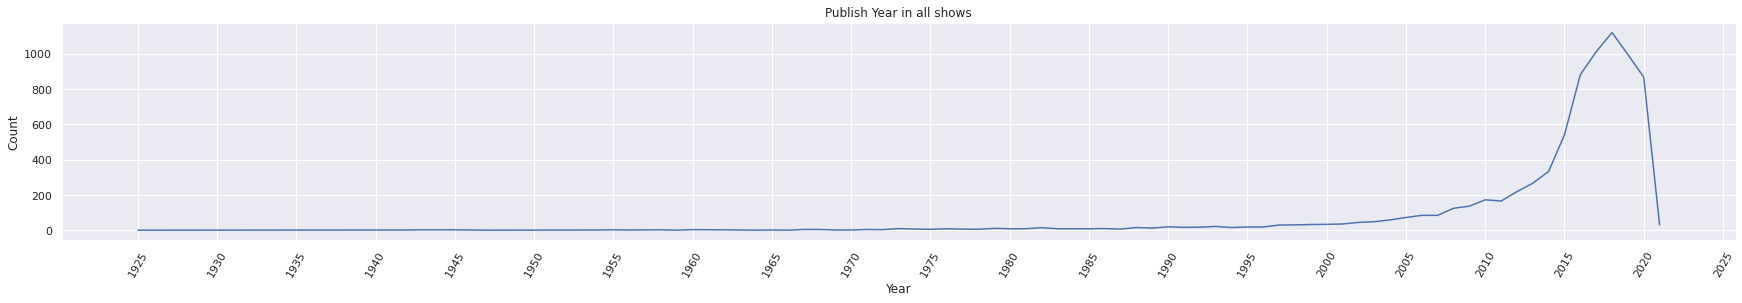

In [ ]:
plt.figure(figsize=(30, 4))
plt.plot(release_year_series.index, release_year_series.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.xticks(rotation=60)
plt.title("Publish Year in all shows")
plt.ylabel("Count")
plt.xlabel("Year")

In [ ]:
df["rating"].nunique()

14

In [ ]:
sns.countplot(df["rating"])
plt.xticks(rotation=90)
plt.title("Rating Count in Netflix")

In [ ]:
df["duration"]

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7787, dtype: object

In [ ]:
movie_duration_series = pd.DataFrame(df[df["type"] == "Movie"]["duration"])
movie_duration_series.head(5)

,duration
1,93 min
2,78 min
3,80 min
4,123 min
6,95 min


Text(0.5, 1.0, 'Movies duration histgram in Netflix')

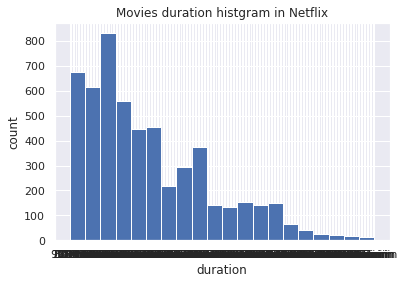

In [ ]:
plt.hist(movie_duration_series["duration"], bins=20)
plt.xlabel("duration")
plt.ylabel("count")
plt.title("Movies duration histgram in Netflix")

Text(0.5, 1.0, 'Relative Frequency Distribution of Movies duration in Netflix')

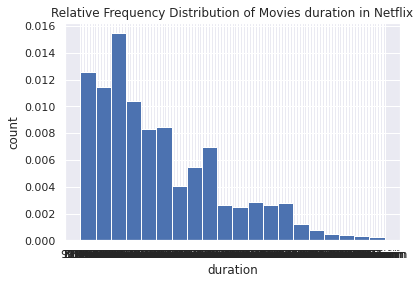

In [ ]:
plt.hist(movie_duration_series["duration"], bins=20, density=True)
plt.xlabel("duration")
plt.ylabel("count")
plt.title("Relative Frequency Distribution of Movies duration in Netflix")

In [ ]:
df["listed_in"]

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
                              ...                        
7782                         Dramas, International Movies
7783       Dramas, International Movies, Music & Musicals
7784    Documentaries, International Movies, Music & M...
7785                   International TV Shows, Reality TV
7786                      Documentaries, Music & Musicals
Name: listed_in, Length: 7787, dtype: object

In [ ]:
frequent_listed_in = {}

for i in df["listed_in"].index:
    listed_in_list = df["listed_in"][i].split(",")
    for listed_in in listed_in_list:
        frequent_listed_in.setdefault(listed_in, 0)
        frequent_listed_in[listed_in] += 1

In [ ]:
sorted_dict = sorted(frequent_listed_in.items(), key=lambda x:x[1], reverse=True)
x = []
y = []
for i in range(len(sorted_dict)):
    x.append(sorted_dict[i][0])
    y.append(sorted_dict[i][1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Show Type Count in Netflix')

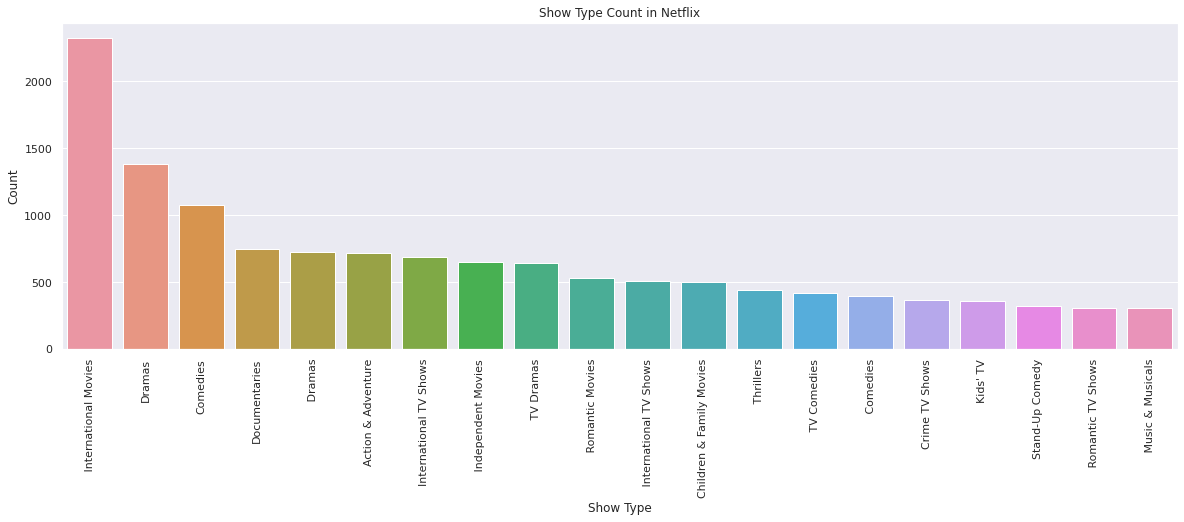

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(x[:20], y[:20])
plt.xticks(rotation=90)
plt.xlabel("Show Type")
plt.ylabel("Count")
plt.title("Show Type Count in Netflix")